In [1]:
import fargopy as fp
from fargopy import DEG,RAD
import matplotlib.pyplot as plt

# For developing purpose. Remove during production
%load_ext autoreload
%autoreload 2

Running FARGOpy version 0.1.3


## Test visualization

In [2]:
sim = fp.Simulation()
sim.set_output_dir('../../public/outputs/p3diso_f0/')

Now you are connected with output directory '../../public/outputs/p3diso_f0/'


In [3]:
vars, domains = sim.load_properties()

Loading variables
85 variables loaded
Simulation in 3 dimensions
Loading domain in spherical coordinates:
	Variable phi: 128 [[0, -3.117048960983623], [-1, 3.117048960983623]]
	Variable r: 64 [[0, 0.5078125], [-1, 1.4921875]]
	Variable theta: 32 [[0, 1.44319539835739], [-1, 1.5687709152323963]]
Configuration variables and domains load into the object. See e.g. <sim>.vars


In [29]:
gasdens2 = sim.load_field('gasdens',snapshot=1)
gasvz2 = sim.load_field('gasvz',snapshot=2)

In [30]:
gasdens, mesh = gasdens2.meshslice(slice='itheta=-1')

(-1.5013514200612197,
 1.4995451522530097,
 -1.4995451522530097,
 1.4995451522530097)

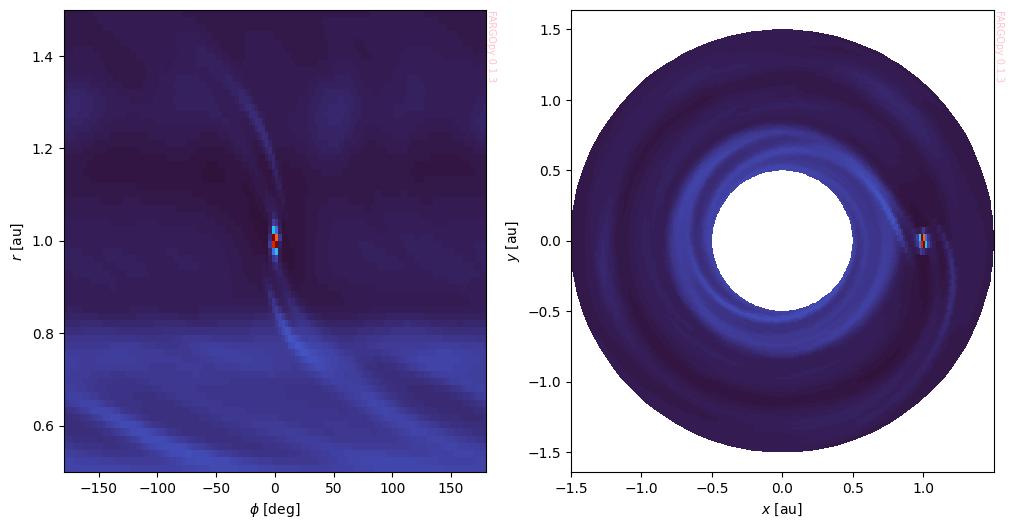

In [35]:
fig,axs = plt.subplots(1,2,figsize=(12,6))

cmap = 'nipy_spectral'
cmap = 'gist_rainbow'
cmap = 'gist_rainbow'
cmap = 'turbo'
ax = axs[0]
ax.pcolormesh(mesh.phi*RAD,mesh.r*sim.UL/fp.AU,gasdens,cmap=cmap)
ax.set_xlabel('$\phi$ [deg]')
ax.set_ylabel('$r$ [au]')
fp.Util.fargopy_mark(ax)

ax = axs[1]
ax.pcolormesh(mesh.x*sim.UL/fp.AU,mesh.y*sim.UL/fp.AU,
              gasdens,cmap=cmap)
ax.set_xlabel('$x$ [au]')
ax.set_ylabel('$y$ [au]')
fp.Util.fargopy_mark(ax)
ax.axis('equal')

Text(1, 1, 'FARGOpy 0.1.3')

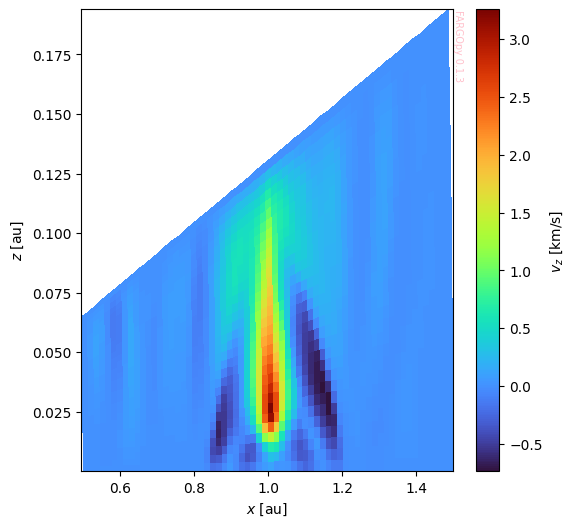

In [50]:
gasvz, mesh = gasvz2.meshslice(slice='phi=0')

fig,axs = plt.subplots(1,1,figsize=(6,6))

cmap = 'turbo'
ax = axs
c = ax.pcolormesh(mesh.x*sim.UL/fp.AU,mesh.z*sim.UL/fp.AU,gasvz*sim.UV/(1e5),cmap=cmap)
cbar = fig.colorbar(c)
cbar.set_label('$v_z$ [km/s]')
ax.set_xlabel('$x$ [au]')
ax.set_ylabel('$z$ [au]')
fp.Util.fargopy_mark(ax)

In [146]:
gasvz.coordinates, gasvz.domains.keys(), gasvz.domains.extrema

('spherical',
 ['extrema', 'phi', 'r', 'theta'],
 {'phi': [[0, -3.117048960983623], [-1, 3.117048960983623]],
  'r': [[0, 0.5078125], [-1, 1.4921875]],
  'theta': [[0, 1.44319539835739], [-1, 1.5687709152323963]]})

In [185]:
#gasvz_r = gasvz.slice(iphi=0,itheta=-1,r=0.82,quiet=False)
#gasvz_r = gasvz.slice(iphi=0,itheta=-1,quiet=False)
gasvz_r = gasvz.slice(phi=0,quiet=False)
gasvz_r.shape

Numeric condition found for coordinate phi
Slice: self.data[:,:,63]


(32, 64)

In [159]:
enumerate([1,2,3])

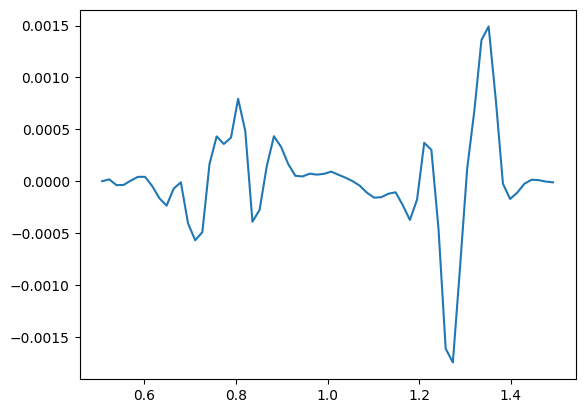

In [131]:
plt.plot(domains.r,gasvz_r)

In [116]:
gasvz_r = gasvz.slice(phi=0,theta=90*DEG,r=1)

{'x': ':', 'y': ':', 'z': ':'} self.data[:,:,:]


In [65]:
print(domains.theta)

[1.4431954  1.44724622 1.45129704 1.45534787 1.45939869 1.46344951
 1.46750034 1.47155116 1.47560198 1.47965281 1.48370363 1.48775445
 1.49180528 1.4958561  1.49990692 1.50395775 1.50800857 1.51205939
 1.51611021 1.52016104 1.52421186 1.52826268 1.53231351 1.53636433
 1.54041515 1.54446598 1.5485168  1.55256762 1.55661845 1.56066927
 1.56472009 1.56877092]


In [96]:
import re

In [102]:
key = 'iphi'
match = re.match('^i(.+)',key)
if match:
    print("Found")

Found


In [33]:
domains.r[3:-3].shape, domains.theta[3:-3].shape

((65,), (33,))

In [23]:
sim.set_units(UM=fp.MSUN, UL=fp.AU)
sim.G, sim.UL, sim.UM, sim.UT/fp.YEAR, sim.USIGMA, sim.URHO, sim.UEPS, sim.UV,

(1,
 14959800000000.0,
 1.9891e+33,
 0.1591509316257186,
 8888020.39645173,
 5.941269533317109e-07,
 5271139.687948494,
 2978603.086001067)

In [9]:
vars.DT, vars.NINTERM

(3.14159265359, 20)

In [ ]:
#Unidades--------------------------------------------------------------#
def units():
        global unit_mass,unit_length,gamma,mu,mp,kb,G,Rgas
        global unit_surf_density,unit_volm_density,unit_time,unit_disktime,unit_orbits
        global unit_temperature,unit_energy,unit_velocity
        #Constantes -------------------------------------------------------#
        kb = 1.380650424e-16                                                                                            #erg/K    | erg = gr cm2 / s2
        mp = 1.672623099e-24                                                                                            #gr
        mu = 2.35                                                                                                                       #mol
        gamma = float(P("GAMMA"))                                                                                       #
        G = 6.67259e-8                                                                                                          #cm3/gr/s2
        Rgas = 8.314472e7                                                                                                               #erg /K/mol
        unit_mass   = 1.9891e33                                                                                         #gr
        unit_length = 1.49598e13                                                                                        #cm
        
        #Unidades ---------------------------------------------------------#
        unit_surf_density = (unit_mass/unit_length**2)                                                  #gr/cm2
        unit_volm_density = (unit_mass/unit_length**3)                                                  #gr/cm3
        unit_temperature  = ((G*mp*mu)/(kb))*(unit_mass/(unit_length))                  #K
        unit_time     = np.sqrt( pow(unit_length,3.) / G / unit_mass) / 3.154e7 #yr
        unit_disktime = float((float(P("NINTERM"))*float(P("DT"))))*unit_time   #yr/snapshot    [Las unidades de tiempo del disco se toman en R=1]
        unit_energy = unit_mass*(unit_length**2)/(unit_time*3.154e7)**2/ unit_length**3.                        #erg
        unit_period   = unit_time*2*np.pi*np.sqrt(Rp**3)                                                #yr
        unit_orbits   = unit_disktime/unit_period                                                               #orbita/snapshot        [Fraccion de la orbita del planeta]
        unit_velocity = 1e-5*unit_length/float(unit_time*3.154e7)                               #km/s
units()

In [2]:
sim = fp.Simulation()

In [3]:
sim.set_output_dir('../fargo3d/outputs/fargo')

Now you are connected with output directory '../fargo3d/outputs/fargo'


In [4]:
outputs = sim.list_outputs()

136 files in output directory
IDL.var, bigplanet0.dat, dims.dat, domain_x.dat, domain_y.dat, domain_z.dat, gasdens0.dat, gasdens0_2d.dat, gasdens1.dat, gasdens10.dat, 
gasdens11.dat, gasdens12.dat, gasdens13.dat, gasdens14.dat, gasdens15.dat, gasdens16.dat, gasdens17.dat, gasdens18.dat, gasdens19.dat, gasdens2.dat, 
gasdens20.dat, gasdens21.dat, gasdens22.dat, gasdens23.dat, gasdens3.dat, gasdens4.dat, gasdens5.dat, gasdens6.dat, gasdens7.dat, gasdens8.dat, 
gasdens9.dat, gasenergy0.dat, gasenergy1.dat, gasenergy10.dat, gasenergy11.dat, gasenergy12.dat, gasenergy13.dat, gasenergy14.dat, gasenergy15.dat, gasenergy16.dat, 
gasenergy17.dat, gasenergy18.dat, gasenergy19.dat, gasenergy2.dat, gasenergy20.dat, gasenergy21.dat, gasenergy22.dat, gasenergy23.dat, gasenergy3.dat, gasenergy4.dat, 
gasenergy5.dat, gasenergy6.dat, gasenergy7.dat, gasenergy8.dat, gasenergy9.dat, gasvx0.dat, gasvx0_2d.dat, gasvx1.dat, gasvx10.dat, gasvx11.dat, 
gasvx12.dat, gasvx13.dat, gasvx14.dat, gasvx15.dat, gasvx

In [5]:
dims = sim._load_dims('dims.dat')
dims

array([  0. ,   0. ,   0. ,   0. ,   2.5,  50. , 128. , 384. ])

In [6]:
vars = sim._load_variables('variables.par')
vars.print_keys()

Loading variables
84 variables load
ALPHA, AMBIPOLARDIFFUSIONCOEFF, ASPECT, ASPECTRATIO, AUTOCOLOR, BETA, CFL, CMAP, COLORBAR, COORDINATES, 
CS, DAMPINGZONE, DT, ECCENTRICITY, EXCLUDEHILL, FIELD, FLARINGINDEX, FRAME, FUNCARCHFILE, GAMMA, 
HALLEFFECTCOEFF, INCLINATION, INDIRECTTERM, KILLINGBCCOLATITUDE, MASSTAPER, NINTERM, NOISE, NSNAP, NTOT, NU, 
NX, NY, NZ, OHMICDIFFUSIONCOEFF, OMEGAFRAME, OORTA, ORBITALRADIUS, OUTPUTDIR, PERIODICY, PERIODICZ, 
PLANETCONFIG, PLANETMASS, PLOTLINE, PLOTLOG, REALTYPE, RELEASEDATE, RELEASERADIUS, RESONANCE, ROCHESMOOTHING, SEMIMAJORAXIS, 
SETUP, SIGMA0, SIGMASLOPE, SPACING, TAUDAMP, THICKNESSSMOOTHING, VERTICALDAMPING, VMAX, VMIN, VTK, 
WRITEBX, WRITEBY, WRITEBZ, WRITEDENSITY, WRITEDIVERGENCE, WRITEENERGY, WRITEENERGYRAD, WRITETAU, WRITEVX, WRITEVY, 
WRITEVZ, XMA, XMAX, XMB, XMC, XMIN, YMA, YMAX, YMB, YMC, 
YMIN, YMY0, ZMAX, ZMIN, VARIABLES, NPHI, NR, DIM


In [7]:
vars.VARIABLES, vars.NR, vars.NPHI, vars.NZ

(['phi', 'r', 'z'], 128, 384, 1)

In [8]:
vars.NX, vars.NY, vars.NZ

(384, 128, 1)

In [9]:
domains = sim._load_domains(vars,'domain_')
domains.print_keys()

Loading domain in cylindrical coordinates:
	Variable phi: 385
	Variable r: 135
	Variable z: 2
phi, r, z


In [10]:
domains.z

array([0., 0.])

In [11]:
vars.COORDINATES

'cylindrical'

In [12]:
import numpy as np
np.array([]).shape

(0,)

In [13]:
import re

In [39]:
comps = None
#file = 'gasvy6.dat'
file = 'gasvy'
match = re.match('(\w+)(\d+).dat',file)
if match is not None:
    comps = [match.group(i) for i in range(1,match.lastindex+1)]
comps

In [32]:
match

In [19]:
match.group(0)

'gasvy6.dat'

In [17]:
match.lastindex

2

## Util

In [2]:
error,out = fp.Util.sysrun('ls -lh',verbose=True)
print(out)

total 44K
-rw-r--r--  1 jzuluaga jzuluaga  24K Nov 16 11:04 Vel_XY.py
drwxr-xr-x 13 jzuluaga jzuluaga 4.0K Nov 17 09:53 public
-rw-r--r--  1 jzuluaga jzuluaga  15K Nov 17 09:55 test-code.ipynb
['total 44K', '-rw-r--r--  1 jzuluaga jzuluaga  24K Nov 16 11:04 Vel_XY.py', 'drwxr-xr-x 13 jzuluaga jzuluaga 4.0K Nov 17 09:53 public', '-rw-r--r--  1 jzuluaga jzuluaga  15K Nov 17 09:55 test-code.ipynb', (0, '')]


In [43]:
error,out = fp.Util.sysrun('ls -lh ..',verbose=True)
print(out)
print("STDOUT:\n",fp.Util.STDOUT)
print("STDERR:\n",fp.Util.STDERR)
print("QERROR:\n",fp.Util.QERROR)

::FARGOpy::sysrun::cmd = ls -lh ..
total 124K
-rw-r--r--  1 jzuluaga jzuluaga 1.1K Nov 15 15:54 LICENSE
-rwxr-xr-x  1 jzuluaga jzuluaga 8.4K Nov 16 01:35 README.ipynb
-rw-r--r--  1 jzuluaga jzuluaga  69K Nov 15 15:58 README.md
drwxr-xr-x  2 jzuluaga jzuluaga 4.0K Nov 15 15:58 bin
drwxr-xr-x  2 jzuluaga jzuluaga 4.0K Nov 16 00:49 dev
drwxr-xr-x  4 jzuluaga jzuluaga 4.0K Nov 15 23:15 fargopy
drwxr-xr-x  2 jzuluaga jzuluaga 4.0K Nov 16 00:03 fargopy.egg-info
-rwxr-xr-x  1 jzuluaga jzuluaga  975 Nov 15 15:58 makefile
drwxr-xr-x 13 jzuluaga jzuluaga 4.0K Nov 16 01:36 public
drwxr-xr-x 11 jzuluaga jzuluaga 4.0K Nov 15 23:24 public.save
-rwxr-xr-x  1 jzuluaga jzuluaga  127 Nov 16 00:02 pyproject.toml
-rwxr-xr-x  1 jzuluaga jzuluaga 2.2K Nov 16 00:02 setup.py
::FARGOpy::sysrun::Done. Check Util.STDOUT and Util.STDERR for details.
['total 124K', '-rw-r--r--  1 jzuluaga jzuluaga 1.1K Nov 15 15:54 LICENSE', '-rwxr-xr-x  1 jzuluaga jzuluaga 8.4K Nov 16 01:35 README.ipynb', '-rw-r--r--  1 jzuluaga 

In [70]:
error,out = fp.Util.sysrun('pwd -q',verbose=True)
print(out)
print("STDOUT:\n",fp.Util.STDOUT)
print("STDERR:\n",fp.Util.STDERR)
print("QERROR:\n",fp.Util.QERROR)

::FARGOpy::sysrun::cmd = pwd -q
::FARGOpy::sysrun::Error check Util.STDERR.
[(2, '/bin/sh: 1: pwd: Illegal option -q\n')]
STDOUT:
 
STDERR:
 /bin/sh: 1: pwd: Illegal option -q

QERROR:
 2


In [75]:
error, out = fp.Util.sysrun("make -C ../public PARALLEL=1")
#error, out = fp.Util.sysrun("make -C ../public clean")

::FARGOpy::sysrun::cmd = make -C ../public PARALLEL=1
make: Entering directory '/home/jzuluaga/fargopy/public'
Skipping w
Skipping --
make[1]: Entering directory '/home/jzuluaga/fargopy/public/bin'
::FARGOpy::sysrun::Error check Util.STDERR.


In [76]:
error

-1

In [77]:
out

["make: Entering directory '/home/jzuluaga/fargopy/public'",
 'Skipping w',
 'Skipping --',
 "make[1]: Entering directory '/home/jzuluaga/fargopy/public/bin'",
 (0,
  '/bin/sh: 1: /bin/sh: 1: /bin/sh: 1: mpicc: not foundmpicc: not foundmpicc: not found\n\n\nmake[1]: *** [psys.o] Error 127\nmake[1]: *** Waiting for unfinished jobs....\nmake[1]: *** [main.o] Error 127\nmake[1]: *** [var.o] Error 127\n/bin/sh: 1: mpicc: not found\nmake[1]: *** [LowTasks.o] Error 127\n/bin/sh: 1: mpicc: not found\nmake[1]: *** [param.o] Error 127\n/bin/sh: 1: mpicc: not found\nmake[1]: *** [usage.o] Error 127\n/bin/sh: 1: mpicc: not found\nmake[1]: *** [split.o] Error 127\n')]

In [74]:
fp.Util.QERROR

-1

In [81]:
ster = 'a b=1'
'_'.join('_'.join(ster.split('=')).split(' '))

'a_b_1'

In [83]:
ster.replace(' ','_').replace('=','_')

'a_b_1'

In [2]:
fp.Util.sysrun('sleep 100')

KeyboardInterrupt: 

In [3]:
sim = fp.Simulation()

In [4]:
sim._is_fargo_here()

AssertionError: FARGO3D source code has not been checked. Run Conf.set_fargo3d().

In [5]:
fp.Conf.set_fargo3d()

> Checking for FARGO3D directroy:
	✓FARGO3D source code is available in your system at './public/'
> Checking for FARGO3D normal binary:
	✓Binary in normal mode compiling correctly
> Checking for FARGO3D parallel binary:
	✓Binary in parallel mode compiling correctly
> Checking for FARGO3D GPU binary:
FARGO3D binary with options 'GPU=1' not compiled at './public/'
	Compiling FARGO3D with GPU (it may take a while)...
	No GPU available


In [6]:
sim._is_fargo_here()

True

In [7]:
sim2 = fp.Simulation()

In [8]:
sim2.list_setups()

['binary',
 'fargo',
 'fargo_multifluid',
 'fargo_nu',
 'mri',
 'otvortex',
 'p3diso',
 'p3disof',
 'sod1d']